# 1. Setup

In [1]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.1.0
asttokens                    2.0.5
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.2.0
certifi                      2022.5.18.1
charset-normalizer           2.0.12
click                        8.1.3
colorama                     0.4.4
cycler                       0.11.0
debugpy                      1.6.0
decorator                    5.1.1
entrypoints                  0.4
executing                    0.8.3
Flask                        2.1.2
flatbuffers                  1.12
fonttools                    4.33.3
gast                         0.4.0
google-auth                  2.6.6
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.46.3
h5py                         3.7.0
idna                         3.3
importlib-metadata           4.11.4
ipykernel                    6.13.0
ipyth

You should consider upgrading via the 'c:\users\zubai\deep learning\imageclassification\imageclassification\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
import os

# 2. Remove problematic images

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data' 

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\arsenal\02e2f-16343073084065-1920.jpg
Image not in ext list data\arsenal\ah6f5k5_arsenal-afp_625x300_25_December_20.jpg
Image not in ext list data\arsenal\Arsenal-transfer-news-Mikel-Arteta-sell-13-players-1440851.webp
Image not in ext list data\arsenal\SEI_91863313.jpg
Image not in ext list data\arsenal\SEI_93226553.jpg
Image not in ext list data\arsenal\skysports-alexandre-lacazette_4974918.jpg
Image not in ext list data\arsenal\skysports-arsenal-lacazette_4941057.jpg
Image not in ext list data\arsenal\skysports-arsenal-olympiakos_4944696.jpg
Image not in ext list data\arsenal\ss-2022-5-17-11-55_trans_NvBQzQNjv4BqsT8WkHhIIGcqf-eU4anH8bkcnEMN6jgniYeqwz6a86k.png
Image not in ext list data\arsenal\TELEMMGLPICT000000289349307_trans_NvBQzQNjv4BqFmZwAHfbzbyjsBBHX-5Jh4h-1OKnoApjyaprnWnv9tw.jpeg
Image not in ext list data\chelsea\0SfYucyYXWDnyh_n3.jpg
Image not in ext list data\chelsea\1622281939_mci-che-players-to-watch-out-for.jpg
Image not in ext list data\chels

# 3. Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 852 files belonging to 6 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [54]:
batch = data_iterator.next()

In [11]:
for idx, img in enumerate(batch[0][:4]):
    print(idx,img)

0 [[[251.70312  254.66602  254.6289  ]
  [245.22461  247.00195  245.89062 ]
  [255.       254.6289   252.07227 ]
  ...
  [255.       249.       252.6289  ]
  [255.       247.22266  250.33398 ]
  [255.       250.85156  253.85156 ]]

 [[241.01562  242.83398  243.92017 ]
  [161.03003  161.53543  160.99637 ]
  [138.04544  135.17293  133.29474 ]
  ...
  [132.1339   121.95703  125.58594 ]
  [155.80133  147.13318  150.2445  ]
  [243.16684  236.24202  239.24202 ]]

 [[237.24762  237.59369  239.24301 ]
  [ 85.27557   83.13957   83.06021 ]
  [ 39.635757  33.40475   32.267494]
  ...
  [ 31.291893  19.248047  21.83506 ]
  [ 68.41838   59.212246  62.19572 ]
  [237.95767  230.61641  233.61641 ]]

 ...

 [[225.25706  243.23648  223.32152 ]
  [ 97.9778   119.35404   93.893814]
  [ 71.39459   94.01427   65.29444 ]
  ...
  [ 83.793304 113.84233   64.21054 ]
  [102.405045 125.9189    87.640656]
  [226.06459  240.66049  215.62904 ]]

 [[232.6503   246.59685  232.85928 ]
  [159.60332  175.53003  157.66386 

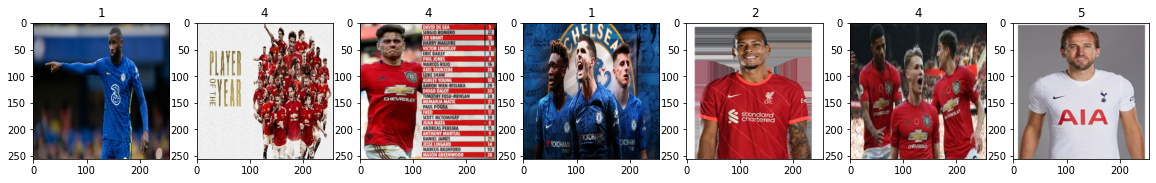

In [55]:
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[3.49019617e-01, 3.68627459e-01, 5.17647088e-01],
          [3.65065873e-01, 3.97510737e-01, 5.30484080e-01],
          [3.65893066e-01, 4.03921574e-01, 5.11458337e-01],
          ...,
          [2.08563119e-01, 1.83486521e-01, 3.47005218e-01],
          [1.95006132e-01, 1.78959861e-01, 3.37607235e-01],
          [2.07843140e-01, 2.07843140e-01, 3.56862754e-01]],
 
         [[3.26554835e-01, 3.42953444e-01, 4.91973042e-01],
          [3.42601091e-01, 3.66584063e-01, 5.02183735e-01],
          [3.43428314e-01, 3.78542125e-01, 4.87050474e-01],
          ...,
          [2.73249596e-01, 2.55563051e-01, 4.15872484e-01],
          [2.16894239e-01, 2.09892794e-01, 3.65913838e-01],
          [1.98215380e-01, 2.04633892e-01, 3.53653491e-01]],
 
         [[3.57115507e-01, 3.67333025e-01, 5.16352654e-01],
          [3.68686348e-01, 3.83084714e-01, 5.17029583e-01],
          [3.74239981e-01, 3.98597181e-01, 5.08399904e-01],
          ...,
          [2.75665700e-01, 2.70556927e-01, 4.2741

# 5. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

18

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [18]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[256, 256, 3]))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=48, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))


In [30]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 48)      1344      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 48)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 48)      20784     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 48)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        13856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)      

# 7. Train

In [32]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(x=train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
18/18 [==============================] - 38s 2s/step - loss: 1.2933 - accuracy: 0.4097 - val_loss: 1.1937 - val_accuracy: 0.4313
Epoch 2/30
18/18 [==============================] - 33s 2s/step - loss: 0.6981 - accuracy: 0.7031 - val_loss: 0.5721 - val_accuracy: 0.7437
Epoch 3/30
18/18 [==============================] - 35s 2s/step - loss: 0.5198 - accuracy: 0.8003 - val_loss: 0.5317 - val_accuracy: 0.7750
Epoch 4/30
18/18 [==============================] - 35s 2s/step - loss: 0.3525 - accuracy: 0.8663 - val_loss: 0.3613 - val_accuracy: 0.8562
Epoch 5/30
18/18 [==============================] - 32s 2s/step - loss: 0.2967 - accuracy: 0.8941 - val_loss: 0.8155 - val_accuracy: 0.6938
Epoch 6/30
18/18 [==============================] - 32s 2s/step - loss: 0.3726 - accuracy: 0.8993 - val_loss: 0.3519 - val_accuracy: 0.9125
Epoch 7/30
18/18 [==============================] - 32s 2s/step - loss: 0.1592 - accuracy: 0.9531 - val_loss: 0.1764 - val_accuracy: 0.9312
Epoch 8/30
18/18 [==

# 8. Plot Performance

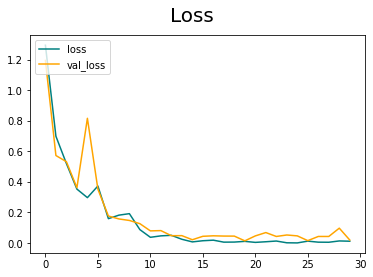

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

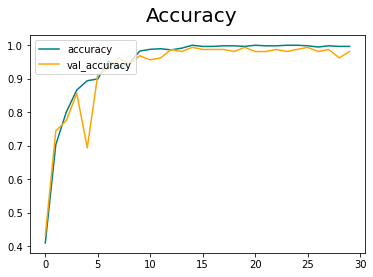

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Test

In [40]:
import cv2

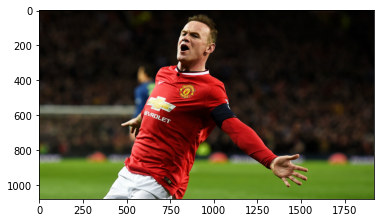

In [121]:
img = cv2.imread('images/manutdtest2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

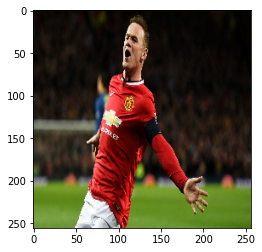

In [122]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [123]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [124]:
yhat

array([[1.3711477e-05, 1.3805067e-05, 3.3849448e-02, 2.4256644e-07,
        9.6612197e-01, 8.2614162e-07]], dtype=float32)

In [125]:
ans=yhat.flatten().tolist()
index=ans.index(max(ans))

In [126]:
max(ans)

0.9661219716072083

In [127]:
if index==0:
    print('Predicted Team is Arsenal')
elif index==1:
    print('Predicted Team is Chelsea')
elif index==2:
    print('Predicted Team is Liverpool')
elif index==3:
    print('Predicted Team is Man City')
elif index==4:
    print('Predicted Team is Man Utd')
elif index==5:
    print('Predicted Team is Tottenham')

Predicted Team is Man Utd


# 10. Save the Model

In [128]:
from tensorflow.keras.models import load_model

In [129]:
model.save(os.path.join('models','multipleTeamClassifier.h5'))

# 11. Test the saved Model

In [131]:
new_model = load_model('models/multipleTeamClassifier.h5')

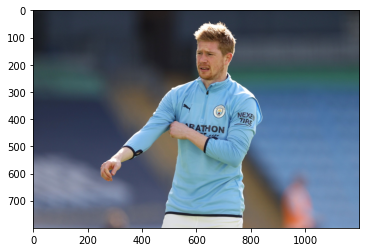

In [132]:
img = cv2.imread('images/mancitytest2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

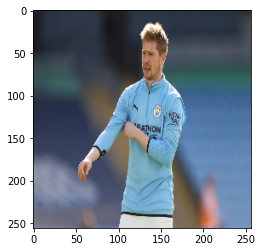

In [133]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [134]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 100ms/step


In [135]:
yhat

array([[6.0246617e-07, 3.4444578e-04, 1.9307371e-09, 9.9965179e-01,
        4.8539741e-09, 3.2385933e-06]], dtype=float32)

In [136]:
ans=yhat.flatten().tolist()
index=ans.index(max(ans))
max(ans)

0.9996517896652222

In [137]:
if index==0:
    print('Predicted Team is Arsenal')
elif index==1:
    print('Predicted Team is Chelsea')
elif index==2:
    print('Predicted Team is Liverpool')
elif index==3:
    print('Predicted Team is Man City')
elif index==4:
    print('Predicted Team is Man Utd')
elif index==5:
    print('Predicted Team is Tottenham')

Predicted Team is Man City
